# Dimensionality Reduction

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Eigenvalues-and-Eigenvectors" data-toc-modified-id="Eigenvalues-and-Eigenvectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Eigenvalues and Eigenvectors</a></span></li><li><span><a href="#Linear-PCA" data-toc-modified-id="Linear-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear PCA</a></span><ul class="toc-item"><li><span><a href="#Create-a-dataset" data-toc-modified-id="Create-a-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create a dataset</a></span></li><li><span><a href="#Compute-the-sample-covariance-matrix-from-the-zero-mean-data" data-toc-modified-id="Compute-the-sample-covariance-matrix-from-the-zero-mean-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compute the sample covariance matrix from the zero-mean data</a></span></li><li><span><a href="#Compute-the-eigenpairs-of-the-covariance-matrix-to-get-PCs" data-toc-modified-id="Compute-the-eigenpairs-of-the-covariance-matrix-to-get-PCs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compute the eigenpairs of the covariance matrix to get PCs</a></span></li><li><span><a href="#Apply-data-transformation-to-reduce-dimension" data-toc-modified-id="Apply-data-transformation-to-reduce-dimension-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Apply data transformation to reduce dimension</a></span></li><li><span><a href="#In-Class-Assignment-:-PCA" data-toc-modified-id="In-Class-Assignment-:-PCA-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><font color="orange">In-Class Assignment : PCA<font></font></font></a></span></li></ul></li><li><span><a href="#Kernel-PCA" data-toc-modified-id="Kernel-PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kernel PCA</a></span><ul class="toc-item"><li><span><a href="#Concentric-circles-data" data-toc-modified-id="Concentric-circles-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Concentric circles data</a></span></li><li><span><a href="#Swiss-roll-data" data-toc-modified-id="Swiss-roll-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Swiss roll data</a></span></li></ul></li><li><span><a href="#Multidimensional-Distance-Scaling-(MDS)" data-toc-modified-id="Multidimensional-Distance-Scaling-(MDS)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multidimensional Distance Scaling (MDS)</a></span></li><li><span><a href="#Locally-Linear-Embedding-(LLE)" data-toc-modified-id="Locally-Linear-Embedding-(LLE)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Locally Linear Embedding (LLE)</a></span></li><li><span><a href="#ISOMAP" data-toc-modified-id="ISOMAP-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ISOMAP</a></span></li></ul></div>

**Load necessary packages and apply custom configurations**

In [1]:
#Change the path to where you put the file
#%run  /Users/peerapon/iCloud/jupyter-libs/load-packages.ipynb
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

#%matplotlib notebook # Lead to interactive plots embedded within the notebook
%matplotlib inline  
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pd.options.plotting.backend = "plotly" 
#Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)

Numpy version 1.21.2
Pandas version 1.3.2
Seaborn version 0.11.2


## Eigenvalues and Eigenvectors

In [2]:
import numpy as np

np.set_printoptions(suppress=True,precision=4)

A = np.array([[1,-2],[1,4]])
egval,egvec = np.linalg.eig(A)
print(egval)
print(egvec)
np.linalg.norm(egvec[:,0])
np.linalg.norm(egvec[:,1])

[2. 3.]
[[-0.8944  0.7071]
 [ 0.4472 -0.7071]]


0.9999999999999999

0.9999999999999999

In [27]:
A = np.array([[6,-2,-1],[-2,6,-1],[-1,-1,5]])
egval,egvec = np.linalg.eig(A)
print(egval)
print(egvec)
np.linalg.norm(egvec[:,0])
np.linalg.norm(egvec[:,1])

[3. 8. 6.]
[[ 0.5774  0.7071 -0.4082]
 [ 0.5774 -0.7071 -0.4082]
 [ 0.5774 -0.      0.8165]]


0.9999999999999999

1.0

## Linear PCA

### Create a dataset 
rows = instances, columns = features  
Scale each column to zero means

[[ 9 39]
 [15 56]
 [25 93]
 [14 61]
 [10 50]
 [18 75]
 [ 0 32]
 [16 85]
 [ 5 42]
 [19 70]
 [16 66]
 [20 80]]
[[ -4.9167 -23.4167]
 [  1.0833  -6.4167]
 [ 11.0833  30.5833]
 [  0.0833  -1.4167]
 [ -3.9167 -12.4167]
 [  4.0833  12.5833]
 [-13.9167 -30.4167]
 [  2.0833  22.5833]
 [ -8.9167 -20.4167]
 [  5.0833   7.5833]
 [  2.0833   3.5833]
 [  6.0833  17.5833]]


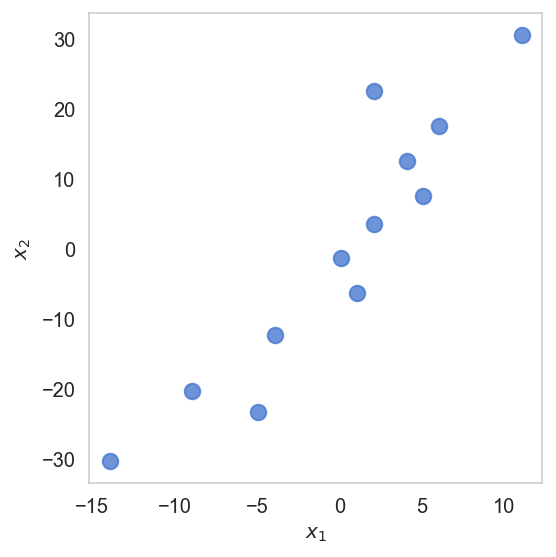

In [47]:
x1 = np.array([9,15,25,14,10,18,0,16,5,19,16,20])
x2 = np.array([39,56,93,61,50,75,32,85,42,70,66,80])

D = np.vstack((x1,x2)).T # Or D = np.stack((x1,x2), axis=1)
print(D)

# Center the data to zero mean.
X = D - D.mean(axis=0, keepdims=True)
print(X)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1],marker='o',s=60, alpha=0.8);
plt.xlabel('$x_1$'); plt.ylabel('$x_2$');
plt.tight_layout();

### Compute the sample covariance matrix from the zero-mean data

In [48]:
Z = np.cov(X, rowvar=False) # Columns as variables
print(Z)   
#วิธีหา sample cov

[[ 47.7197 122.947 ]
 [122.947  370.0833]]


### Self Test : Covaraince and Total Variance

[[ 5  4]
 [ 1 -2]
 [-1  1]
 [ 3  1]]
[[ 3.  3.]
 [-1. -3.]
 [-3.  0.]
 [ 1.  0.]]


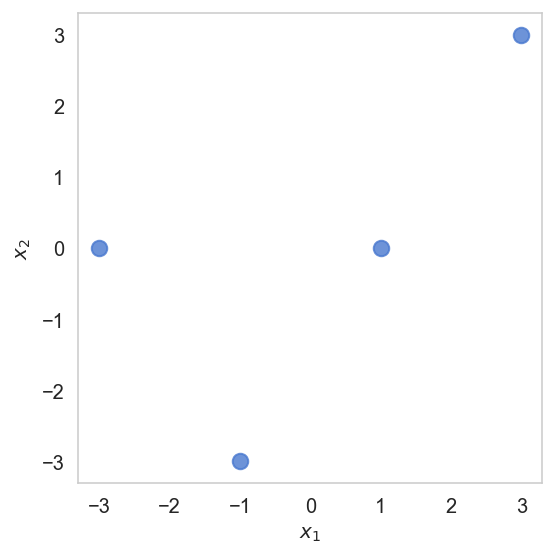

In [42]:
x1 = np.array([5,1,-1,3])
x2 = np.array([4,-2,1,1])

D = np.vstack((x1,x2)).T # Or D = np.stack((x1,x2), axis=1)
print(D)

# Center the data to zero mean.
X = D - D.mean(axis=0, keepdims=True)
print(X)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1],marker='o',s=60, alpha=0.8);
plt.xlabel('$x_1$'); plt.ylabel('$x_2$');
plt.tight_layout();

In [43]:
Z1 = np.cov(X, rowvar=False) # Columns as variables
print(Z1)
#วิธีหา simple cov

[[6.6667 4.    ]
 [4.     6.    ]]


### Compute the eigenpairs of the covariance matrix to get PCs
pick the first two with largest eigenvalues

In [49]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(Z)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

Eigenvalues: 
 [411.6219   6.1812]
Eigenvectors: 
 [[-0.3201 -0.9474]
 [-0.9474  0.3201]]


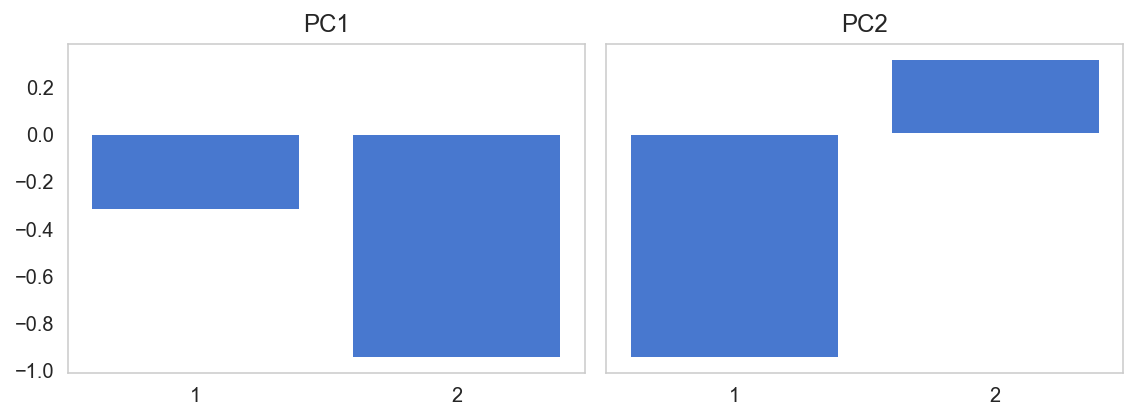

In [50]:
r = 2
org_dim = X.shape[1]

f, ax = plt.subplots(1, r, sharey=True, figsize=(8,3)) 

for i in range(r):
    ax[i].bar(list(map(str,range(1,org_dim+1))), egvec[:,i])
    ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();

### Apply data transformation to reduce dimension

In [8]:
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = X @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[-0.3201 -0.9474]
 [-0.9474  0.3201]]
Transformed data: 
 [[ 23.7584  -2.8373]
 [  5.7323  -3.0802]
 [-32.5219  -0.711 ]
 [  1.3155  -0.5324]
 [ 13.0171  -0.2637]
 [-13.2283   0.1592]
 [ 33.2709   3.4487]
 [-22.0621   5.2548]
 [ 22.1966   1.9125]
 [ -8.8115  -2.3886]
 [ -4.0617  -0.8268]
 [-18.6054  -0.1352]]
Component 1: 98.52%
Component 2: 1.48%
All 2 components: 100.0%


**Covariance matrix of the transformed data**

In [9]:
np.cov(X_pca, rowvar=False)

array([[411.6219,   0.    ],
       [  0.    ,   6.1812]])

**Plot the original data against the one converted from the first few PCs.**

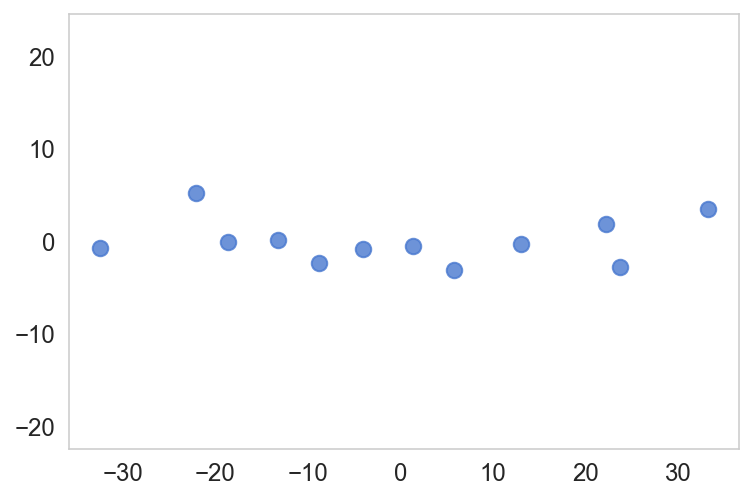

In [10]:
# Plot transformed data.
plt.figure();
plt.scatter(X_pca[:,0], X_pca[:, 1], alpha=0.8, s=60)
plt.axis('equal');

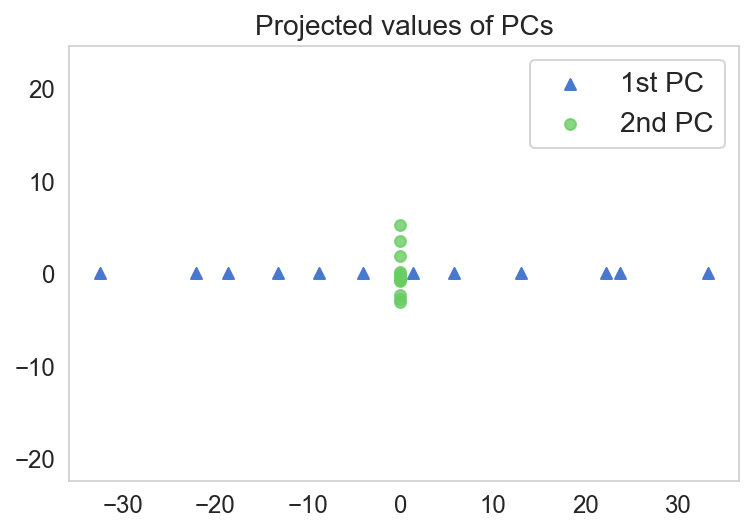

In [11]:
plt.figure()
plt.scatter(X_pca[:,0], np.zeros_like(X_pca[:,0]),marker='^',s=30)
plt.scatter(np.zeros_like(X_pca[:,1]), X_pca[:,1],alpha=0.8,s=30)
plt.legend(['1st PC','2nd PC'])

plt.axis('equal');
plt.title('Projected values of PCs'); pass;

### <font color='orange'>In-Class Assignment : PCA<font>

In [64]:
z = np.array([[0.6857, -0.0393, 1.2737, 0.5169],
    [-0.0393, 0.1880, -0.3217, -0.1180],
    [1.2737, -0.3217, 3.1132, 1.2964],
    [0.5169, -0.1180, 1.2964, 0.5824]])
z

array([[ 0.6857, -0.0393,  1.2737,  0.5169],
       [-0.0393,  0.188 , -0.3217, -0.118 ],
       [ 1.2737, -0.3217,  3.1132,  1.2964],
       [ 0.5169, -0.118 ,  1.2964,  0.5824]])

In [65]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(z)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

Eigenvalues: 
 [4.2249 0.2422 0.0785 0.0237]
Eigenvectors: 
 [[ 0.3616 -0.6565 -0.5811  0.3171]
 [-0.0823 -0.7297  0.5966 -0.3238]
 [ 0.8566  0.1757  0.0727 -0.4797]
 [ 0.3588  0.0748  0.5487  0.7514]]


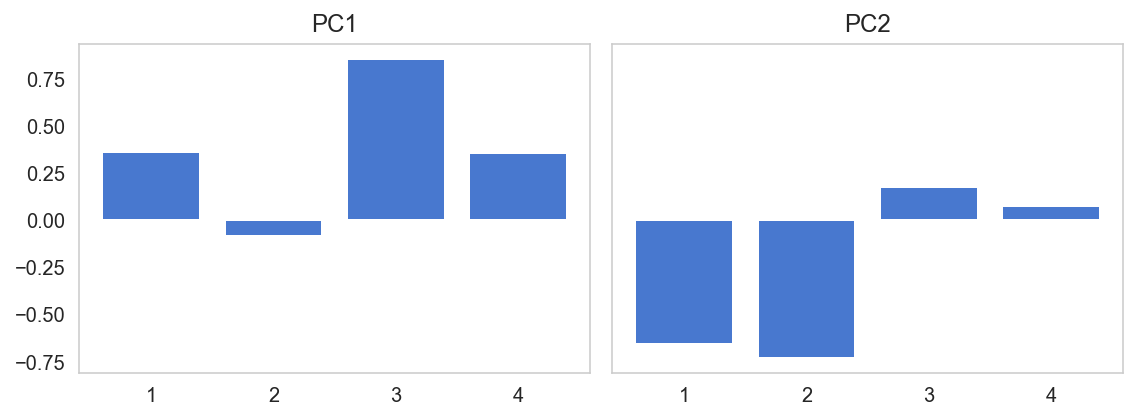

In [66]:
r = 2
org_dim = z.shape[1]

f, ax = plt.subplots(1, r, sharey=True, figsize=(8,3)) 

for i in range(r):
    ax[i].bar(list(map(str,range(1,org_dim+1))), egvec[:,i])
    ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();

In [69]:
X = [[5.8 ,2.7, 5.1, 1.9]]

In [71]:
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = X @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[ 0.3616 -0.6565]
 [-0.0823 -0.7297]
 [ 0.8566  0.1757]
 [ 0.3588  0.0748]]
Transformed data: 
 [[ 6.9254 -4.7398]]
Component 1: 92.46%
Component 2: 5.30%
All 2 components: 97.8%


In [73]:
X_pca @ Pr.transpose()

array([[5.6161, 2.8889, 5.0992, 2.1306]])

## Homework 1

#### Compute the mean vector (ZERO Mean)

In [74]:
x1 = np.array([8,0,10,10,2])
x2 = np.array([-20,-1,-19,-20,0])

D = np.vstack((x1,x2)).T # Or D = np.stack((x1,x2), axis=1)
print(D)

# Center the data to zero mean.
X = D - D.mean(axis=0, keepdims=True)
print(X)

[[  8 -20]
 [  0  -1]
 [ 10 -19]
 [ 10 -20]
 [  2   0]]
[[ 2. -8.]
 [-6. 11.]
 [ 4. -7.]
 [ 4. -8.]
 [-4. 12.]]


#### Compute the covariance matrix

In [75]:
Z1 = np.cov(X, rowvar=False) # Columns as variables
print(Z1)
#วิธีหา simple cov

[[ 22.  -47.5]
 [-47.5 110.5]]


#### Determine the eigenpairs of the covariance matrix

In [76]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(Z1)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

Eigenvalues: 
 [131.1677   1.3323]
Eigenvectors: 
 [[ 0.399 -0.917]
 [-0.917 -0.399]]


#### Compute the first principal component

In [77]:
r = 2
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = X @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[ 0.399 -0.917]
 [-0.917 -0.399]]
Transformed data: 
 [[  8.1336   1.3579]
 [-12.4804   1.113 ]
 [  8.0146  -0.875 ]
 [  8.9316  -0.476 ]
 [-12.5994  -1.1199]]
Component 1: 98.99%
Component 2: 1.01%
All 2 components: 100.0%


## Homework 3

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data/L01-dimensionality-reduction.xlsx', sheet_name='MTCARS')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [59]:
x = df.mean()
x

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [60]:
dfstd = df.std()
dfstd

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [62]:
# centering
df = df.apply(lambda x : x - df.mean(), axis=1)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.909375,-0.1875,-70.721875,-36.6875,0.303437,-0.59725,-1.38875,-0.4375,0.59375,0.3125,1.1875
1,0.909375,-0.1875,-70.721875,-36.6875,0.303437,-0.34225,-0.82875,-0.4375,0.59375,0.3125,1.1875
2,2.709375,-2.1875,-122.721875,-53.6875,0.253437,-0.89725,0.76125,0.5625,0.59375,0.3125,-1.8125
3,1.309375,-0.1875,27.278125,-36.6875,-0.516563,-0.00225,1.59125,0.5625,-0.40625,-0.6875,-1.8125
4,-1.390625,1.8125,129.278125,28.3125,-0.446563,0.22275,-0.82875,-0.4375,-0.40625,-0.6875,-0.8125
5,-1.990625,-0.1875,-5.721875,-41.6875,-0.836563,0.24275,2.37125,0.5625,-0.40625,-0.6875,-1.8125
6,-5.790625,1.8125,129.278125,98.3125,-0.386563,0.35275,-2.00875,-0.4375,-0.40625,-0.6875,1.1875
7,4.309375,-2.1875,-84.021875,-84.6875,0.093437,-0.02725,2.15125,0.5625,-0.40625,0.3125,-0.8125
8,2.709375,-2.1875,-89.921875,-51.6875,0.323437,-0.06725,5.05125,0.5625,-0.40625,0.3125,-0.8125
9,-0.890625,-0.1875,-63.121875,-23.6875,0.323437,0.22275,0.45125,0.5625,-0.40625,0.3125,1.1875


In [63]:
Z = np.cov(df, rowvar=False) # Columns as variables
print(Z)

[[   36.3241    -9.1724  -633.0972  -320.7321     2.1951    -5.1167
      4.5091     2.0171     1.8039     2.1357    -5.3631]
 [   -9.1724     3.1895   199.6603   101.9315    -0.6684     1.3674
     -1.8869    -0.7298    -0.4657    -0.6492     1.5202]
 [ -633.0972   199.6603 15360.7998  6721.1587   -47.064    107.6842
    -96.0517   -44.3776   -36.564    -50.8026    79.0688]
 [ -320.7321   101.9315  6721.1587  4700.8669   -16.4511    44.1927
    -86.7701   -24.9879    -8.3206    -6.3589    83.0363]
 [    2.1951    -0.6684   -47.064    -16.4511     0.2859    -0.3727
      0.0871     0.1186     0.1902     0.276     -0.0784]
 [   -5.1167     1.3674   107.6842    44.1927    -0.3727     0.9574
     -0.3055    -0.2737    -0.3381    -0.4211     0.6758]
 [    4.5091    -1.8869   -96.0517   -86.7701     0.0871    -0.3055
      3.1932     0.6706    -0.205     -0.2804    -1.8941]
 [    2.0171    -0.7298   -44.3776   -24.9879     0.1186    -0.2737
      0.6706     0.254      0.0423     0.0766    -

In [64]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(Z)
# see egval,egvec before sorting
print(egval,'\n',egvec)
# ถ้าค่า eigen ไม่ได้เรียงจากมากสุดไปน้อยสุด ค่ามันก็ควรจะเรียงตาม column 
# ดังนั้น ค่าแรกที่ออกมาเป้นค่าที่มากสุดและมันคือค่าของ mpg ดังนั้น mpg จึงเป็น original features ที่มีค่า large weights

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

[18641.2732  1455.2758     9.4311     1.7073     0.8217     0.4403
     0.0952     0.0818     0.0394     0.0444     0.0628] 
 [[ 0.0381 -0.0092  0.9821  0.0476 -0.0883 -0.1438 -0.0392  0.0227 -0.0159
   0.0306  0.0028]
 [-0.012   0.0034 -0.0635 -0.228   0.2387 -0.7938  0.425  -0.189   0.1454
   0.1317 -0.0427]
 [-0.8996 -0.4354  0.0314 -0.0051 -0.0107  0.0074  0.0006 -0.0006  0.0009
  -0.0054 -0.0035]
 [-0.4348  0.8993  0.0251  0.0357  0.0166  0.0017 -0.0022  0.     -0.0022
   0.0019  0.0037]
 [ 0.0027  0.0039  0.0397 -0.0571 -0.1333  0.2272  0.0348 -0.9386 -0.0974
   0.1841  0.0141]
 [-0.0062 -0.0049 -0.0849  0.128  -0.2435 -0.1271 -0.1866  0.1562 -0.0199
   0.8299  0.3906]
 [ 0.0067 -0.025  -0.0717  0.8865 -0.2142 -0.1896  0.2548 -0.1029  0.0111
  -0.2042  0.0959]
 [ 0.0027 -0.0022  0.0042  0.1771 -0.0169  0.1026 -0.0808 -0.0021  0.6257
   0.3031 -0.684 ]
 [ 0.002   0.0058  0.0548 -0.1357 -0.0627  0.2052  0.2009 -0.0227  0.7332
  -0.1628  0.5724]
 [ 0.0026  0.0113  0.0485 -0.1299 -0.

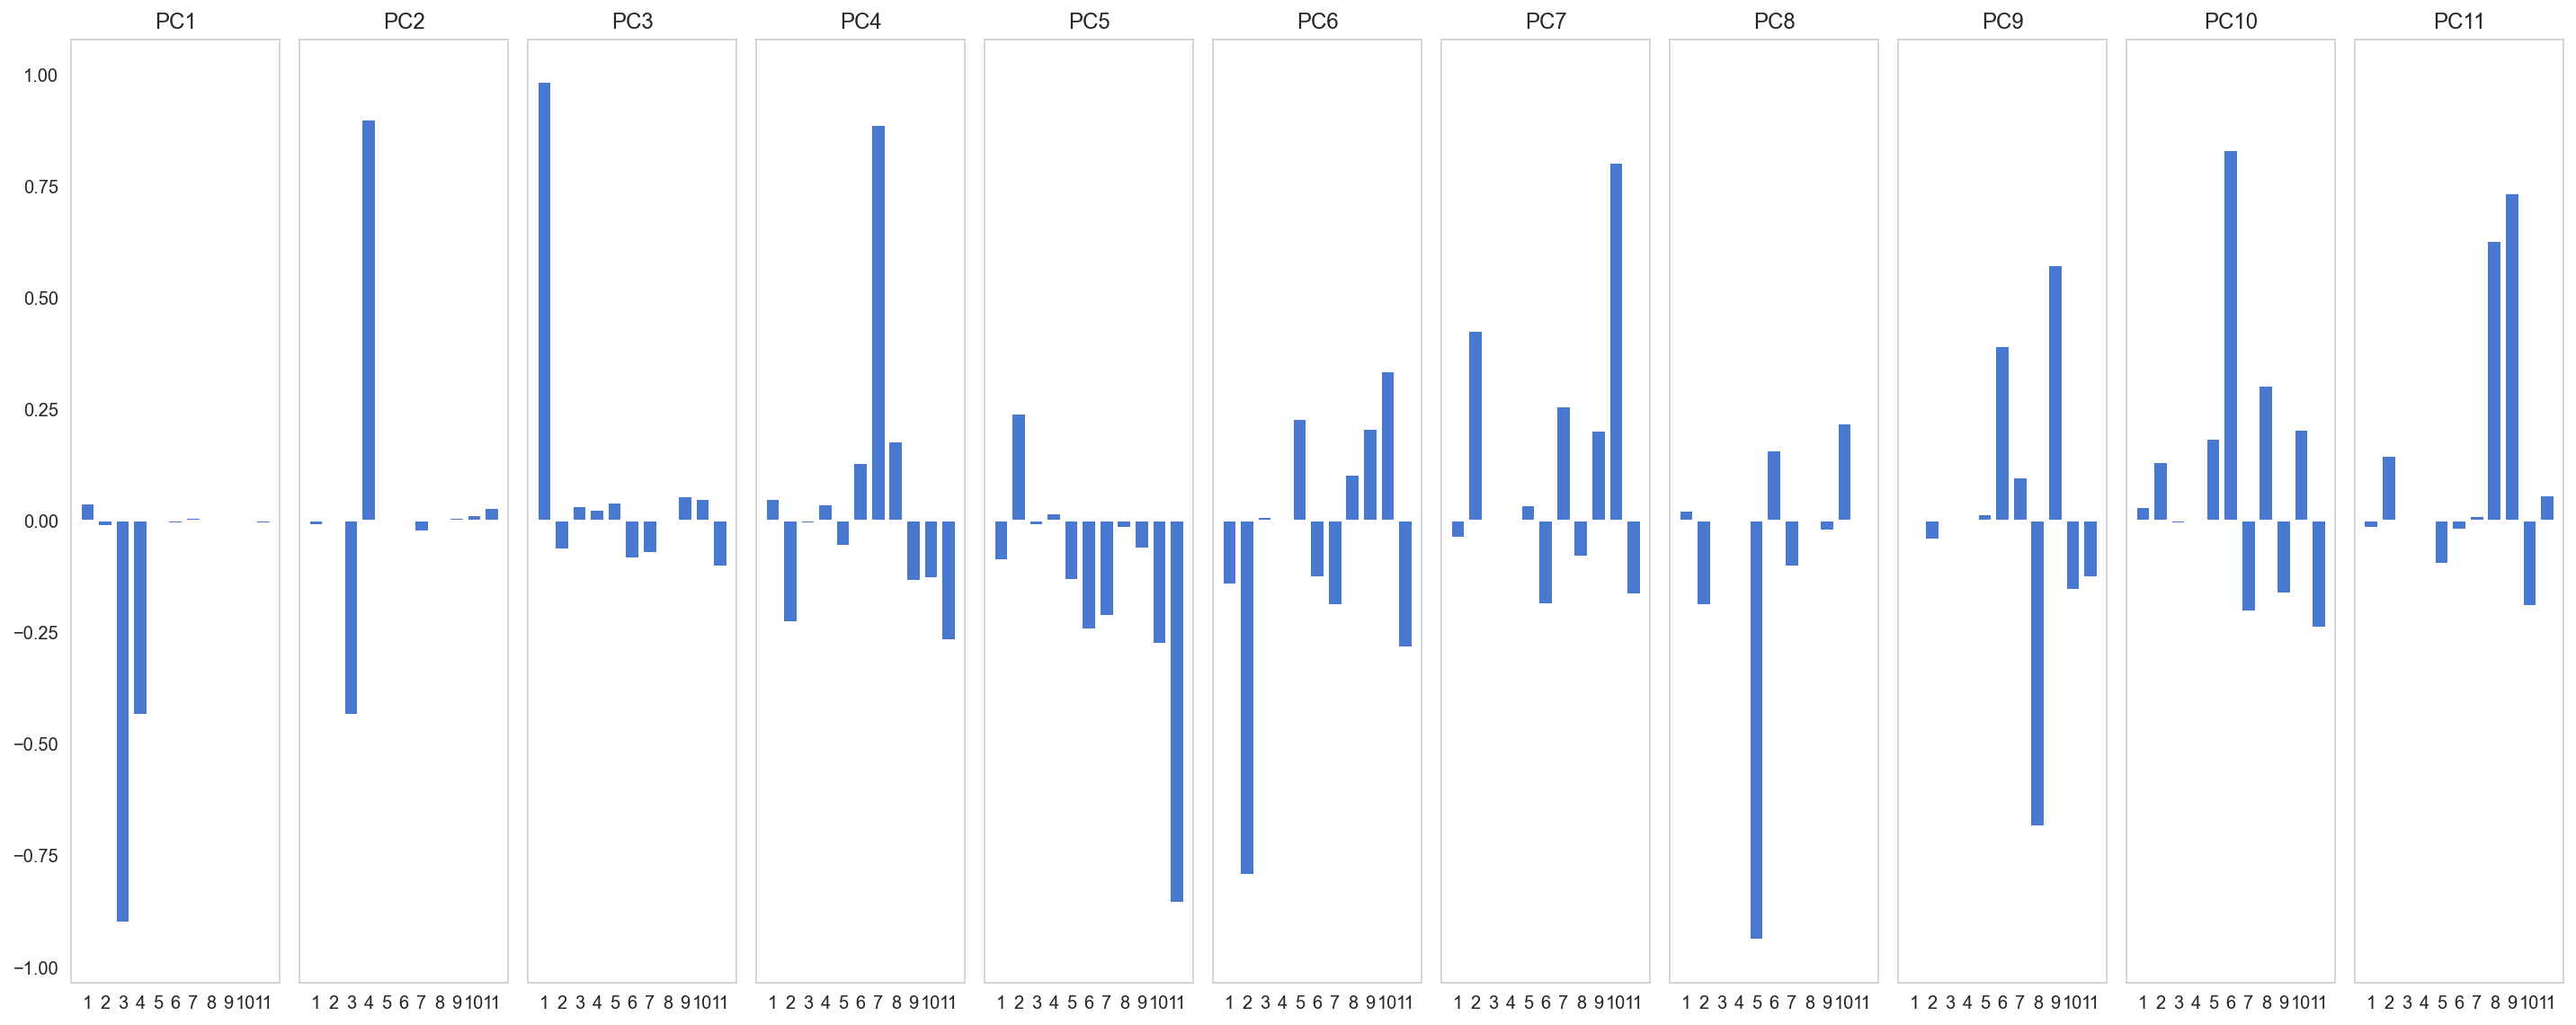

In [65]:
r = 11
org_dim = df.shape[1]

f, ax = plt.subplots(1, r, sharey=True, figsize=(20,8)) 

for i in range(r):
    ax[i].bar(list(map(str,range(1,org_dim+1))), egvec[:,i])
    ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();

In [66]:
r = 11
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = df @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[ 0.0381 -0.0092  0.9821  0.0476 -0.0883 -0.1438 -0.0392  0.0227  0.0028
   0.0306 -0.0159]
 [-0.012   0.0034 -0.0635 -0.228   0.2387 -0.7938  0.425  -0.189  -0.0427
   0.1317  0.1454]
 [-0.8996 -0.4354  0.0314 -0.0051 -0.0107  0.0074  0.0006 -0.0006 -0.0035
  -0.0054  0.0009]
 [-0.4348  0.8993  0.0251  0.0357  0.0166  0.0017 -0.0022  0.      0.0037
   0.0019 -0.0022]
 [ 0.0027  0.0039  0.0397 -0.0571 -0.1333  0.2272  0.0348 -0.9386  0.0141
   0.1841 -0.0974]
 [-0.0062 -0.0049 -0.0849  0.128  -0.2435 -0.1271 -0.1866  0.1562  0.3906
   0.8299 -0.0199]
 [ 0.0067 -0.025  -0.0717  0.8865 -0.2142 -0.1896  0.2548 -0.1029  0.0959
  -0.2042  0.0111]
 [ 0.0027 -0.0022  0.0042  0.1771 -0.0169  0.1026 -0.0808 -0.0021 -0.684
   0.3031  0.6257]
 [ 0.002   0.0058  0.0548 -0.1357 -0.0627  0.2052  0.2009 -0.0227  0.5724
  -0.1628  0.7332]
 [ 0.0026  0.0113  0.0485 -0.1299 -0.2762  0.335   0.8016  0.2175 -0.1561
   0.2035 -0.1909]
 [-0.0058  0.0278 -0.1029 -0.2689 -0.8552 -0.28

In [75]:
# centering and divide by STD
df = df.apply(lambda x : (x - df.mean())/df.std(), axis=1)

In [71]:
Z = np.cov(df, rowvar=False) # Columns as variables
print(Z)

[[ 1.     -0.8522 -0.8476 -0.7762  0.6812 -0.8677  0.4187  0.664   0.5998
   0.4803 -0.5509]
 [-0.8522  1.      0.902   0.8324 -0.6999  0.7825 -0.5912 -0.8108 -0.5226
  -0.4927  0.527 ]
 [-0.8476  0.902   1.      0.7909 -0.7102  0.888  -0.4337 -0.7104 -0.5912
  -0.5556  0.395 ]
 [-0.7762  0.8324  0.7909  1.     -0.4488  0.6587 -0.7082 -0.7231 -0.2432
  -0.1257  0.7498]
 [ 0.6812 -0.6999 -0.7102 -0.4488  1.     -0.7124  0.0912  0.4403  0.7127
   0.6996 -0.0908]
 [-0.8677  0.7825  0.888   0.6587 -0.7124  1.     -0.1747 -0.5549 -0.6925
  -0.5833  0.4276]
 [ 0.4187 -0.5912 -0.4337 -0.7082  0.0912 -0.1747  1.      0.7445 -0.2299
  -0.2127 -0.6562]
 [ 0.664  -0.8108 -0.7104 -0.7231  0.4403 -0.5549  0.7445  1.      0.1683
   0.206  -0.5696]
 [ 0.5998 -0.5226 -0.5912 -0.2432  0.7127 -0.6925 -0.2299  0.1683  1.
   0.7941  0.0575]
 [ 0.4803 -0.4927 -0.5556 -0.1257  0.6996 -0.5833 -0.2127  0.206   0.7941
   1.      0.2741]
 [-0.5509  0.527   0.395   0.7498 -0.0908  0.4276 -0.6562 -0.5696  0.0575


In [72]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(Z)
print(egval,'\n',egvec)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

[6.6084 2.6505 0.6272 0.022  0.052  0.077  0.1229 0.1353 0.2696 0.2235
 0.2116] 
 [[ 0.3625 -0.0161  0.2257  0.1249  0.1393  0.2357  0.7541 -0.3677 -0.0225
   0.1028  0.1088]
 [-0.3739 -0.0437  0.1753  0.1407 -0.8464  0.054   0.2308 -0.0573 -0.0026
   0.0585 -0.1686]
 [-0.3682  0.0493  0.0615 -0.6606  0.0494  0.1984 -0.0011 -0.2143  0.2566
   0.394   0.3362]
 [-0.3301 -0.2488 -0.14    0.2565  0.2478 -0.5758  0.2224  0.0015 -0.0677
   0.54   -0.0714]
 [ 0.2942 -0.2747 -0.1612  0.0395 -0.1015 -0.0469 -0.0322 -0.0211  0.8548
   0.0773 -0.2445]
 [-0.3461  0.143  -0.3418  0.5674  0.0944  0.3595  0.0086  0.0207  0.2459
  -0.075   0.4649]
 [ 0.2005  0.4634 -0.4032 -0.1814 -0.2707 -0.5284  0.2318 -0.05    0.0681
  -0.1647  0.3305]
 [ 0.3065  0.2316 -0.4288 -0.0084 -0.159   0.3586 -0.0259  0.2658 -0.2148
   0.5995 -0.194 ]
 [ 0.2349 -0.4294  0.2058 -0.0298 -0.1778 -0.0474  0.0597  0.5873 -0.0305
   0.0898  0.5708]
 [ 0.2069 -0.4623 -0.2898  0.0535 -0.2138 -0.0017 -0.3362 -0.6051 -0.2647
   0.04

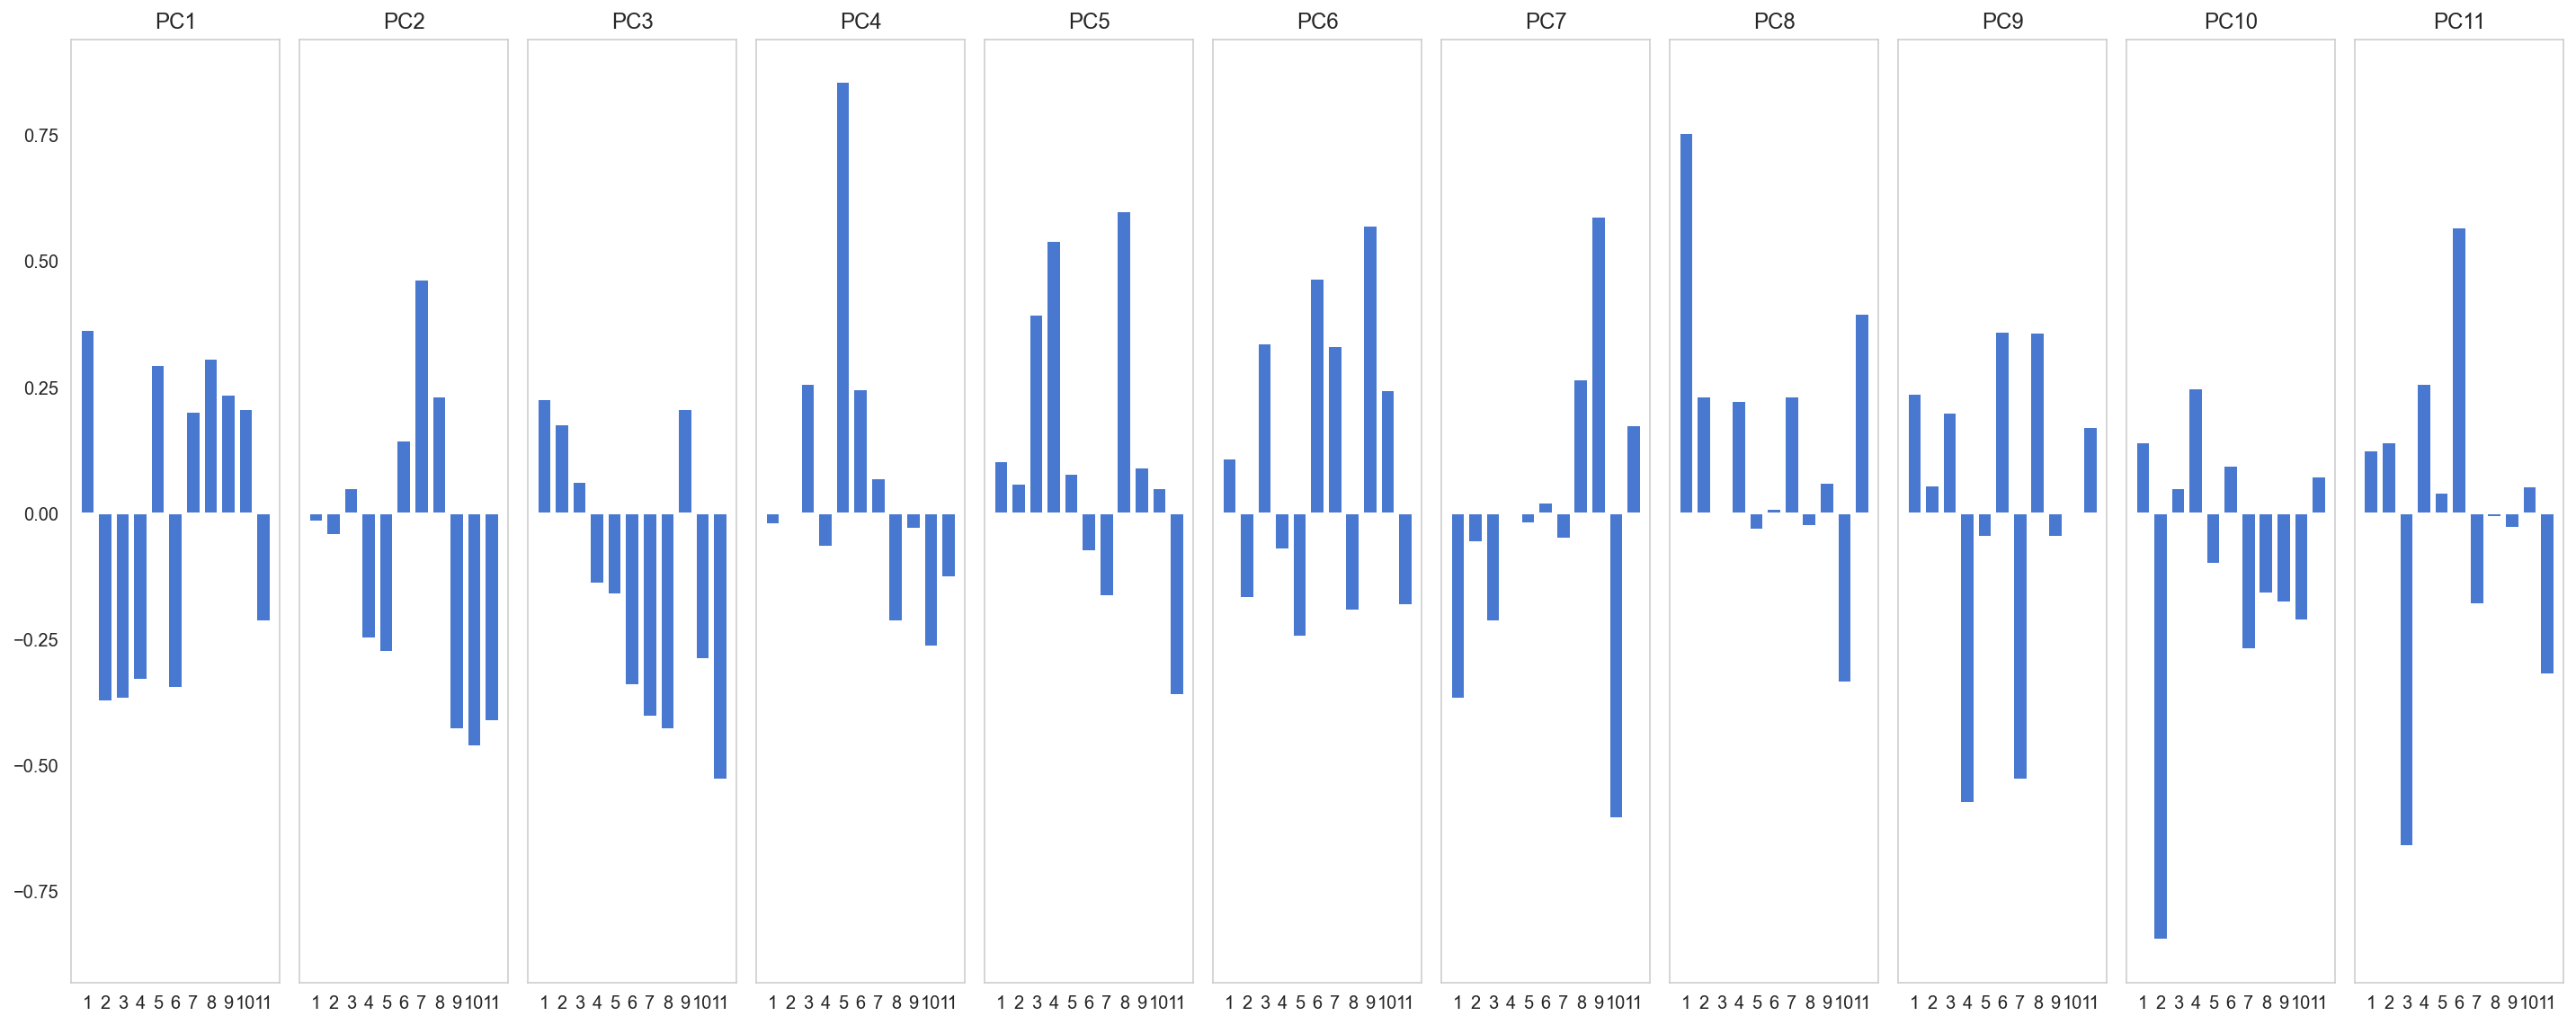

In [73]:
r = 11
org_dim = df.shape[1]

f, ax = plt.subplots(1, r, sharey=True, figsize=(20,8)) 

for i in range(r):
    ax[i].bar(list(map(str,range(1,org_dim+1))), egvec[:,i])
    ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();

In [74]:
r = 11
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = df @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[ 0.3625 -0.0161  0.2257 -0.0225  0.1028  0.1088 -0.3677  0.7541  0.2357
   0.1393  0.1249]
 [-0.3739 -0.0437  0.1753 -0.0026  0.0585 -0.1686 -0.0573  0.2308  0.054
  -0.8464  0.1407]
 [-0.3682  0.0493  0.0615  0.2566  0.394   0.3362 -0.2143 -0.0011  0.1984
   0.0494 -0.6606]
 [-0.3301 -0.2488 -0.14   -0.0677  0.54   -0.0714  0.0015  0.2224 -0.5758
   0.2478  0.2565]
 [ 0.2942 -0.2747 -0.1612  0.8548  0.0773 -0.2445 -0.0211 -0.0322 -0.0469
  -0.1015  0.0395]
 [-0.3461  0.143  -0.3418  0.2459 -0.075   0.4649  0.0207  0.0086  0.3595
   0.0944  0.5674]
 [ 0.2005  0.4634 -0.4032  0.0681 -0.1647  0.3305 -0.05    0.2318 -0.5284
  -0.2707 -0.1814]
 [ 0.3065  0.2316 -0.4288 -0.2148  0.5995 -0.194   0.2658 -0.0259  0.3586
  -0.159  -0.0084]
 [ 0.2349 -0.4294  0.2058 -0.0305  0.0898  0.5708  0.5873  0.0597 -0.0474
  -0.1778 -0.0298]
 [ 0.2069 -0.4623 -0.2898 -0.2647  0.0483  0.2436 -0.6051 -0.3362 -0.0017
  -0.2138  0.0535]
 [-0.214  -0.4136 -0.5285 -0.1268 -0.3613 -0.18

## Kernel PCA
https://sebastianraschka.com/Articles/2014_kernel_pca.html#kernel-functions-and-the-kernel-trick

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pca = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pca

### Concentric circles data

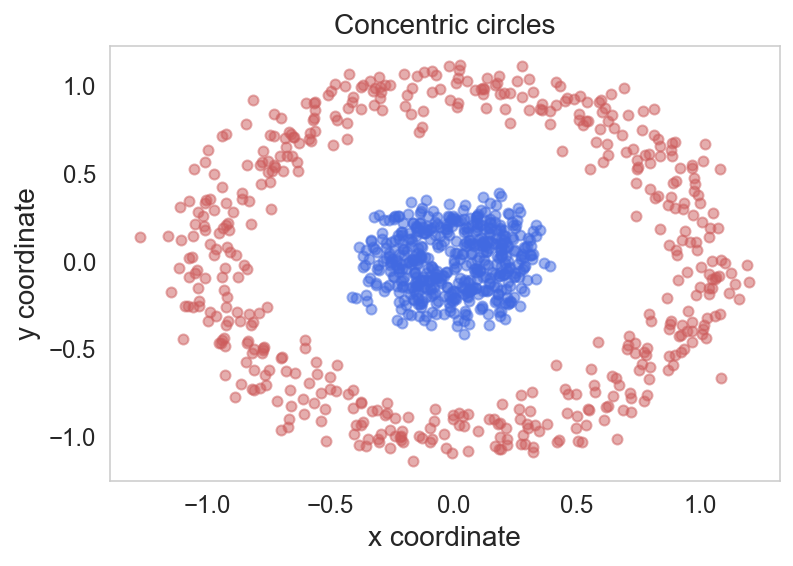

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(6,4))

plt.scatter(X[y==0, 0], X[y==0, 1], color='indianred', alpha=0.5) # Class 1
plt.scatter(X[y==1, 0], X[y==1, 1], color='royalblue', alpha=0.5) # Class 2
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show();

**Apply linear PCA**

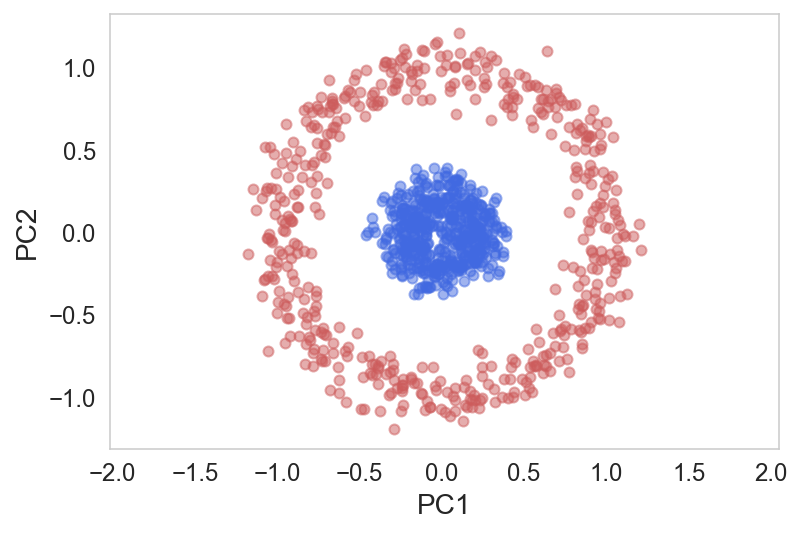

In [14]:
from sklearn.decomposition import PCA


scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)

# Plot transformed data.
plt.figure();
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='indianred', alpha=0.5) # Class 1
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='royalblue', alpha=0.5) # Class 2
plt.axis('equal');
plt.xlabel('PC1'); plt.ylabel('PC2'); pass;

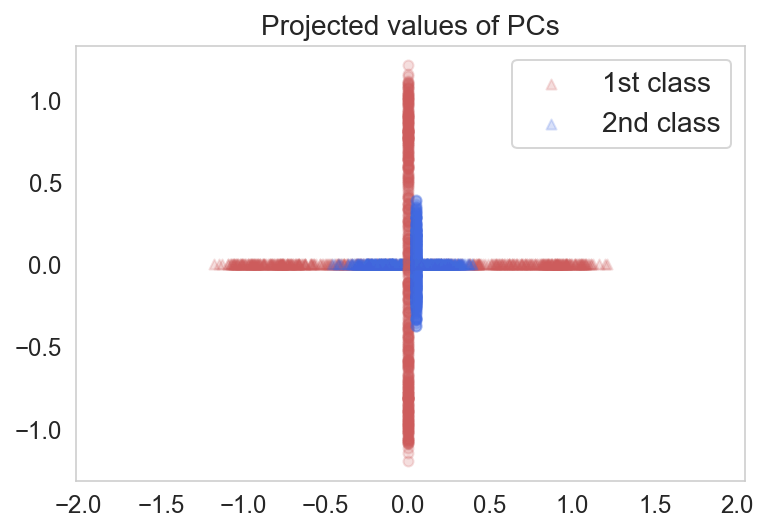

In [15]:
plt.figure()

plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0]),color='indianred', alpha=0.2, marker='^')
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0]),color='royalblue', alpha=0.2, marker='^')


plt.scatter(np.zeros_like(X_pca[y==0,1]), X_pca[y==0,1],color='indianred', alpha=0.2, marker='o')
plt.scatter(np.zeros_like(X_pca[y==1,1])+0.05, X_pca[y==1,1],color='royalblue', alpha=0.2, marker='o')

plt.legend(['1st class','2nd class'])

plt.axis('equal');
plt.title('Projected values of PCs'); pass;

**Apply non-linear PCA with RBF kernel**

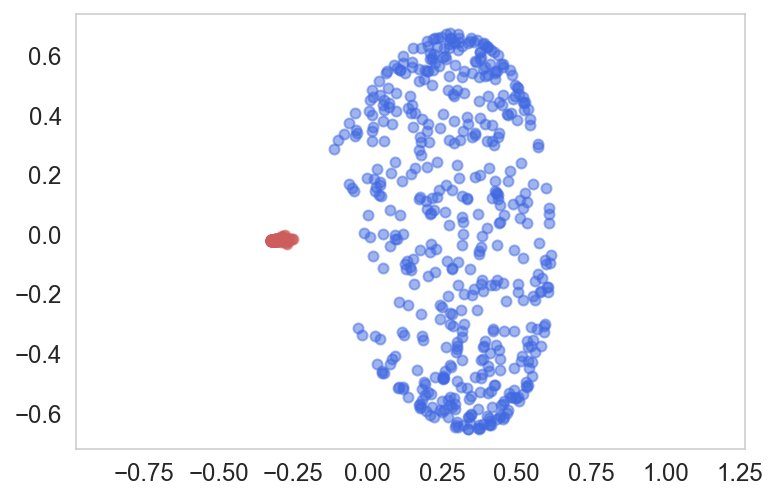

In [16]:
from sklearn.decomposition import KernelPCA

#X_pca = stepwise_kpca(X, gamma=15, n_components=1)

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=15)
X_pca_rbf = rbf_pca.fit_transform(X)
  
# Plot transformed data.
plt.figure();
plt.scatter(X_pca_rbf[y==0, 0], X_pca_rbf[y==0, 1], color='indianred', alpha=0.5) # Class 1
plt.scatter(X_pca_rbf[y==1, 0], X_pca_rbf[y==1, 1], color='royalblue', alpha=0.5) # Class 2
plt.axis('equal');

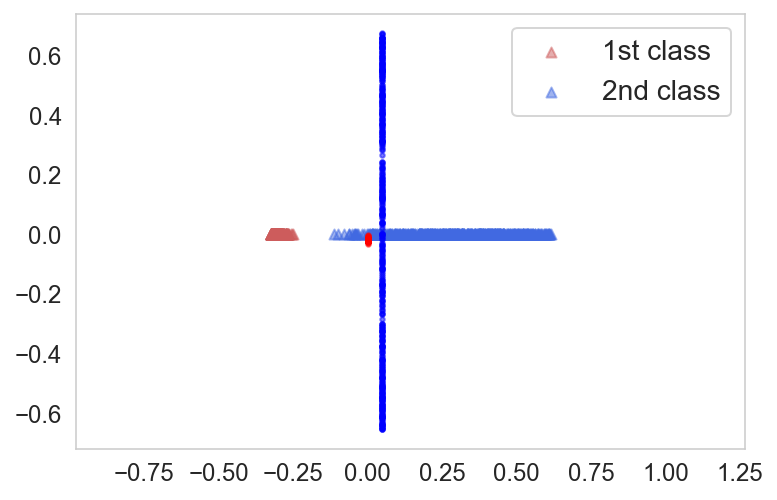

In [17]:
plt.figure()
plt.scatter(X_pca_rbf[y==0,0], np.zeros_like(X_pca_rbf[y==0,0]),color='indianred', alpha=0.5, marker='^')
plt.scatter(X_pca_rbf[y==1,0], np.zeros_like(X_pca_rbf[y==1,0]),color='royalblue', alpha=0.5, marker='^')


plt.scatter(np.zeros_like(X_pca_rbf[y==0,1]), X_pca_rbf[y==0,1],color='red', alpha=0.5, marker='o',s=5)
plt.scatter(np.zeros_like(X_pca_rbf[y==1,1])+0.05, X_pca_rbf[y==1,1],color='blue', alpha=0.5, marker='o',s=5)

plt.legend(['1st class','2nd class'])

plt.axis('equal');

### Swiss roll data

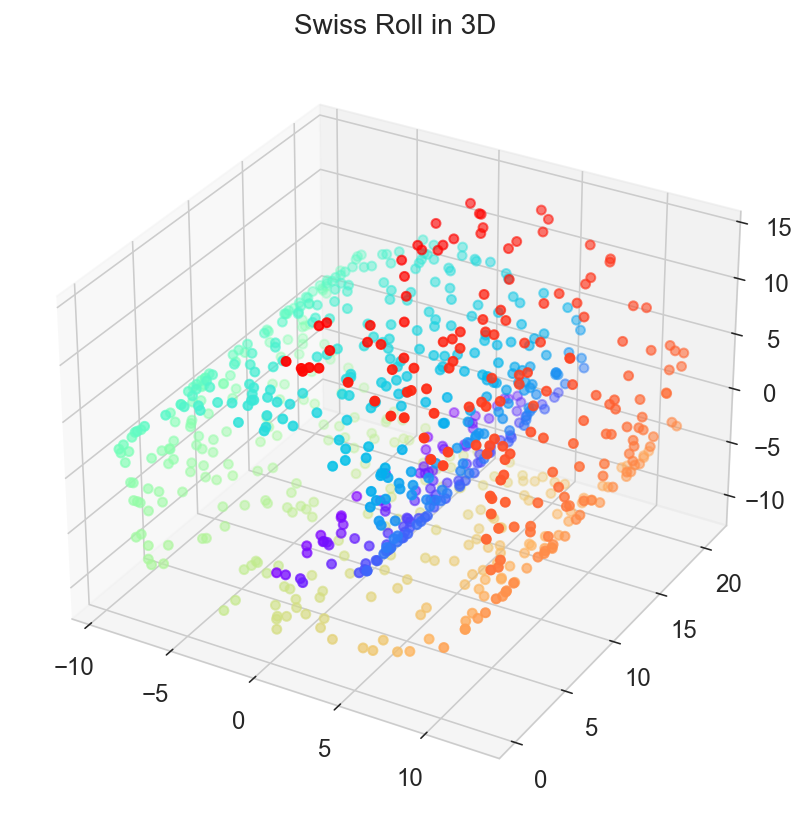

In [18]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show(); 

**Apply linear PCA**

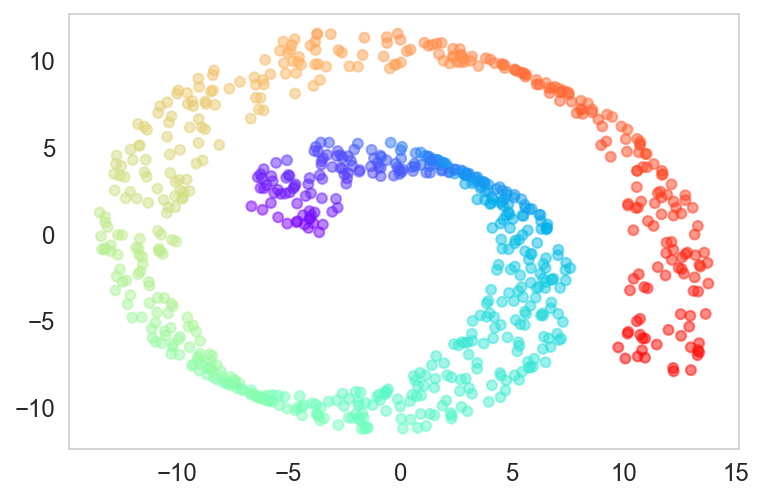

In [19]:
from sklearn.decomposition import PCA


scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)

# Plot transformed data.
plt.figure();
plt.scatter(X_pca[:,0], X_pca[:, 1], c=color, cmap=plt.cm.rainbow, alpha=0.5)
pass;

**Apply non-linear PCA with RBF kernel**

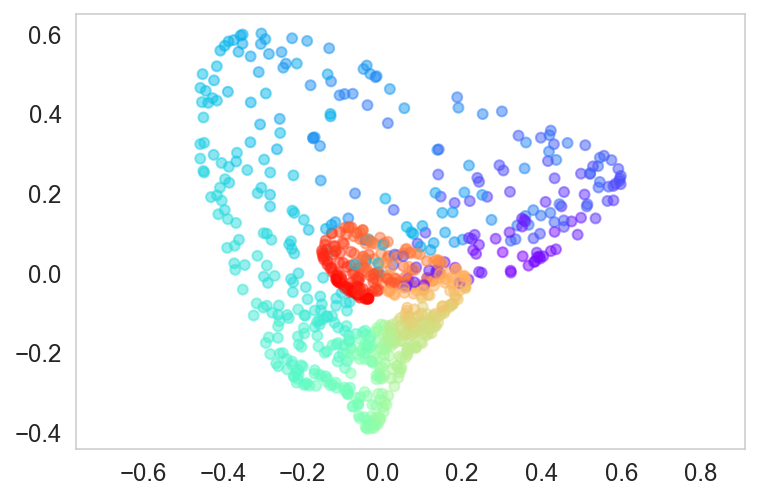

In [20]:
from sklearn.decomposition import KernelPCA


rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_pca_rbf = rbf_pca.fit_transform(X)
  
# Plot transformed data.
plt.figure();
plt.scatter(X_pca_rbf[:, 0], X_pca_rbf[:, 1], c=color, cmap=plt.cm.rainbow, alpha=0.5)
plt.axis('equal');

## Multidimensional Distance Scaling (MDS)

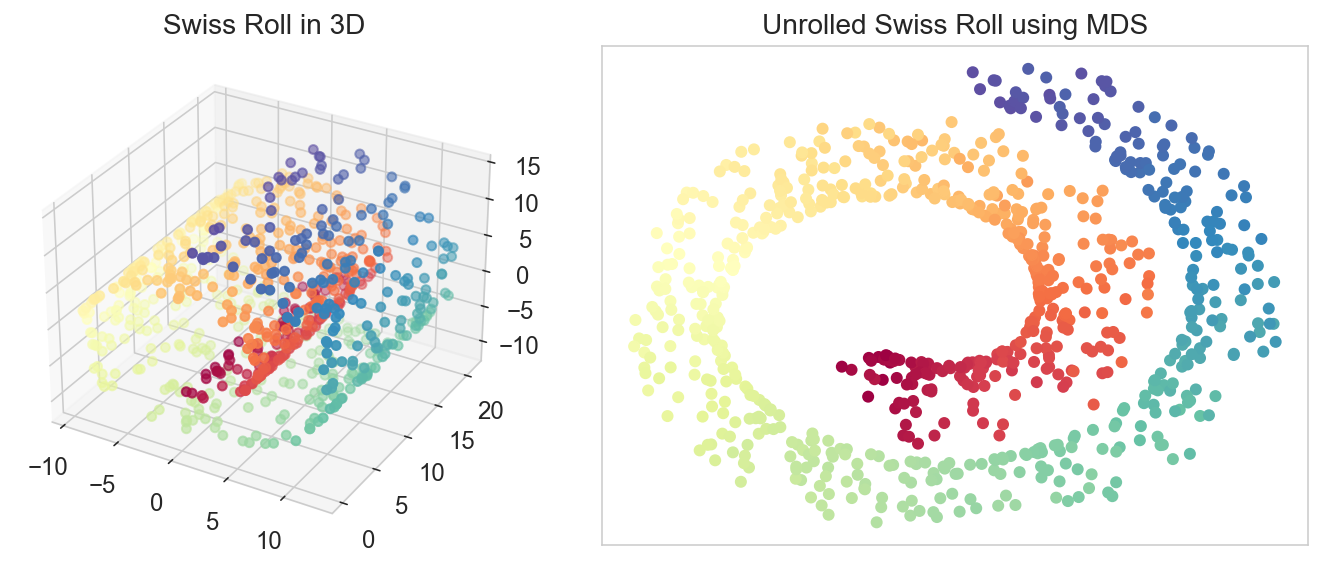

In [21]:
from sklearn import manifold
from sklearn.metrics.pairwise import pairwise_distances

X, color = make_swiss_roll(n_samples=800, random_state=123)


dist_matrix=pairwise_distances(X, metric='euclidean')

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(dist_matrix)

X_mds = results.embedding_


fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Swiss Roll in 3D")
ax = fig.add_subplot(122)
ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Unrolled Swiss Roll using MDS')
plt.tight_layout();

## Locally Linear Embedding (LLE)

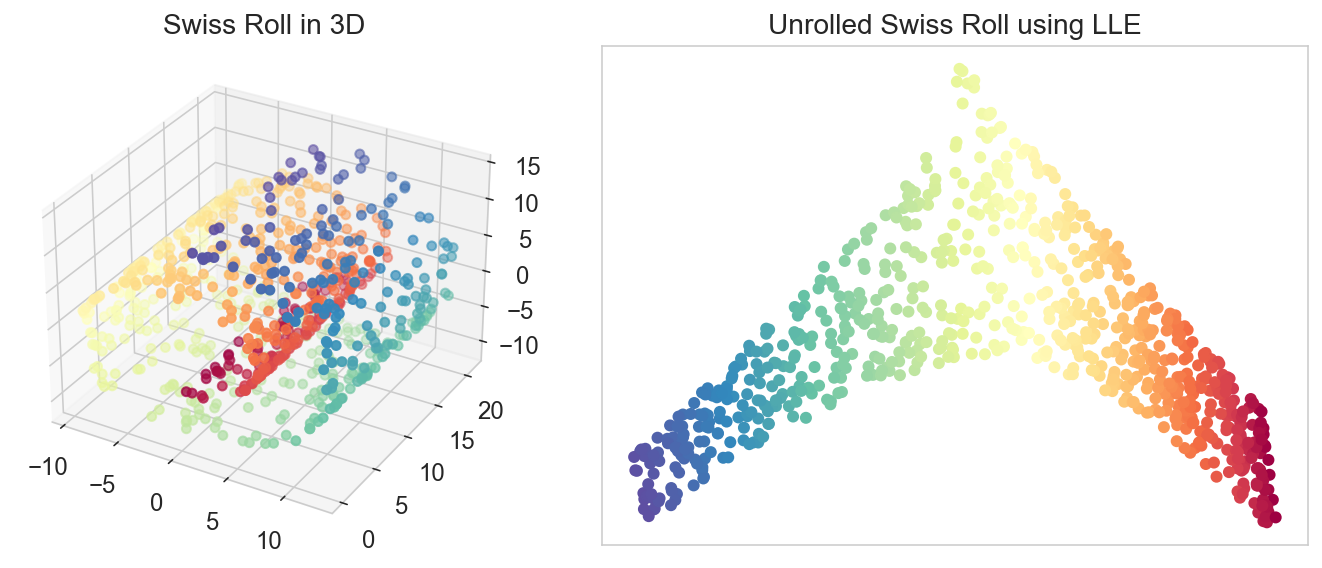

In [22]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)


from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
  
  
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Swiss Roll in 3D")
ax = fig.add_subplot(122)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Unrolled Swiss Roll using LLE')
plt.tight_layout();

## ISOMAP

LLE: 0.084 sec
ISOMAP: 0.25 sec


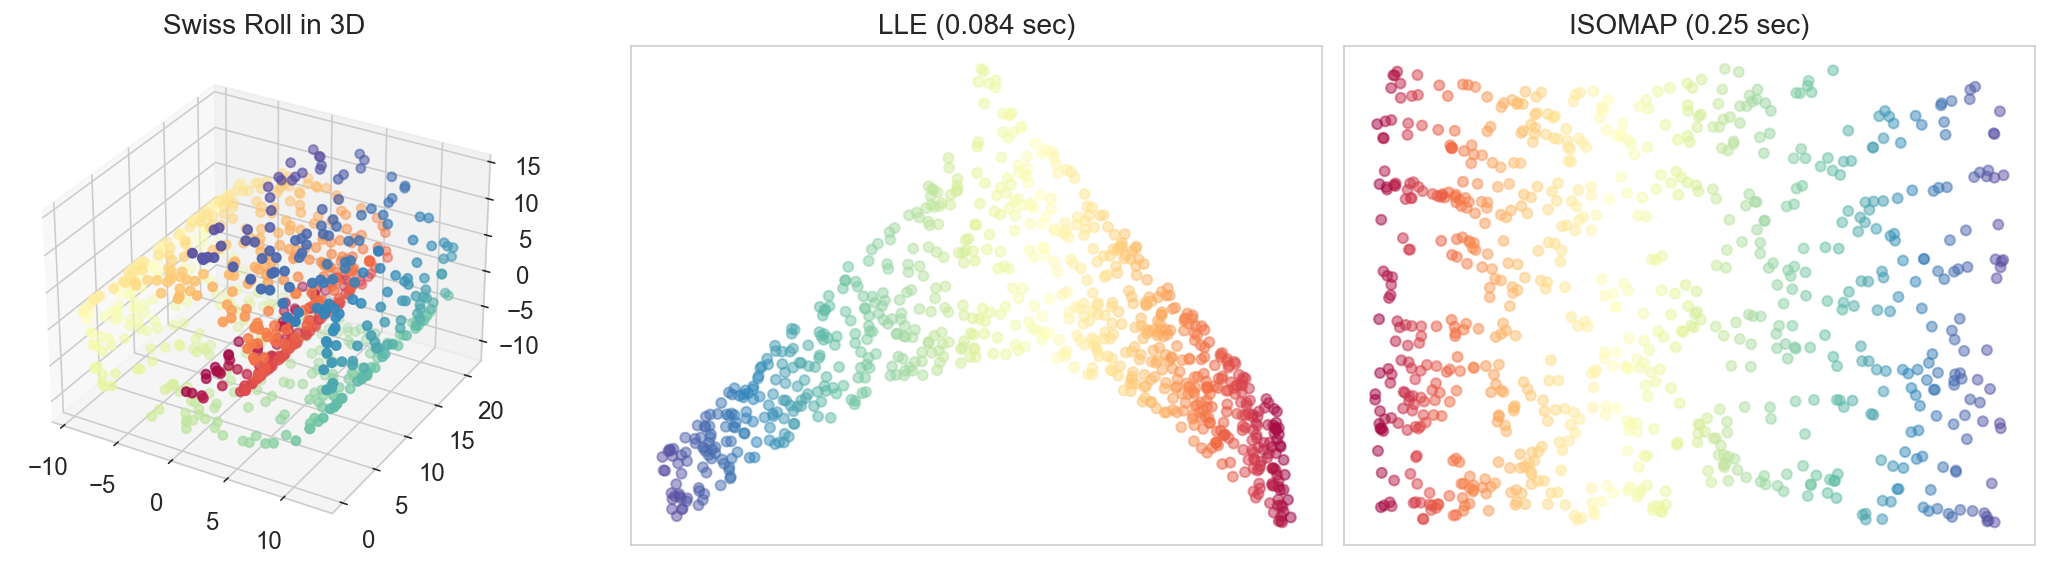

In [23]:
from collections import OrderedDict
from time import time

from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter


X, color = make_swiss_roll(n_samples=800, random_state=123)

methods = OrderedDict()


from sklearn.manifold import Isomap, LocallyLinearEmbedding


methods['LLE'] = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
methods['ISOMAP'] = Isomap(n_components=2, n_neighbors=10)


  
fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll in 3D")


# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(1, 3, 2 + i)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral,alpha=0.5)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.tight_layout();